# Replicate Piantadosi et al (2012) across five languages

**Sean Trott** and **Benjamin Bergen**

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
from tqdm import tqdm

import src.utils as utils
import src.config as config

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [4]:
TARGET = 'num_homophones'
COVARIATES = [
    'surprisal',
    'num_sylls_est',
    # 'CobLog'
    # 'neighborhood_size'
]
FORMULA = '{y} ~ {regressors}'.format(y=TARGET, regressors=' + '.join(COVARIATES))

COVARIATE_LABELS = [
    'surprisal', 
    '#syllables', 
    # '#minimal pairs'
]
LANGUAGE = 'English'

In [76]:
def make_aggregated_plot(df, language, syl_column, homophone_column="num_homophones",
                        x_axis="#Syllables", y_axis="#Homophones"):
    
    language_upper = language[0].upper() + language[1:]
    df_agg_real = utils.agg_homophones_by_syllable(df_processed, 
                                          syl_column=syl_column, 
                                          homophone_column='num_homophones')

    plt.title("{lan}: {y} by {x}".format(lan=language_upper, y=y_axis, x=x_axis))
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)

    plt.errorbar(df_agg_real['num_sylls'], df_agg_real['mean_homophones'], 
                        yerr=df_agg_real['sem_homophones'], color="red", ecolor="orange")
    
    ### Set up directories
    if not os.path.exists("Figures/{lan}/replication_results".format(lan=language)):
        print("Creating directory: Figures/{lan}/replication_results".format(lan=language))
        os.mkdir("Figures/{lan}/replication_results".format(lan=language))
    plt.savefig("Figures/{l1}/replication_results/{l2}_{y}_{x}.png".format(l1=language,
                                                                               l2=language,
                                                                               y=y_axis,
                                                                               x=x_axis),
                dpi=300)

## Replicate in English, German, and Dutch

### English

In [77]:
language = 'english'

In [78]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language("english")

In [48]:
len(df_og)

51888

In [49]:
len(df_processed)

34924

In [50]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.1546,
 'mean_homophones': 0.1885,
 'max_homophones': 7,
 'mean_mp': 1.9622,
 'max_mp': 34,
 'total_mp': 68527,
 'mean_mp_w_hp': 3.3003,
 'max_mp_w_hp': 86,
 'total_mp_w_hp': 115260}

#### Main analysis

In [51]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                34924
Model:                        Poisson   Df Residuals:                    34921
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Oct 2019   Pseudo R-squ.:                  0.1320
Time:                        11:21:39   Log-Likelihood:                -16110.
converged:                       True   LL-Null:                       -18559.
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2793      0.124     10.348      0.000       1.037       1.522
surprisal        -0.2007      0.028     -7.119      0.000      -0.256      -0.145
num_sylls_est    -0.8767      0.020    -44.770      0.000      -0.915      -0.838
=================================================================================
"""

#### Visualization

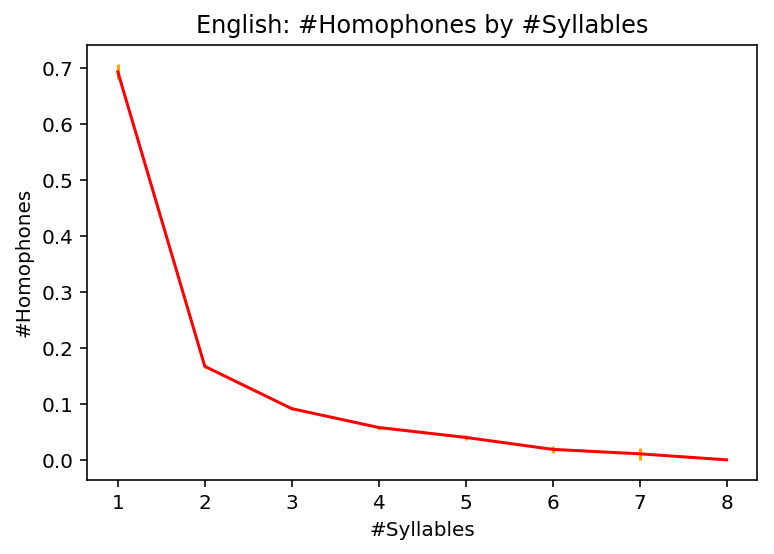

In [79]:
make_aggregated_plot(df_processed,
                    language='english',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Syllables")

/Users/seantrott/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/seantrott/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


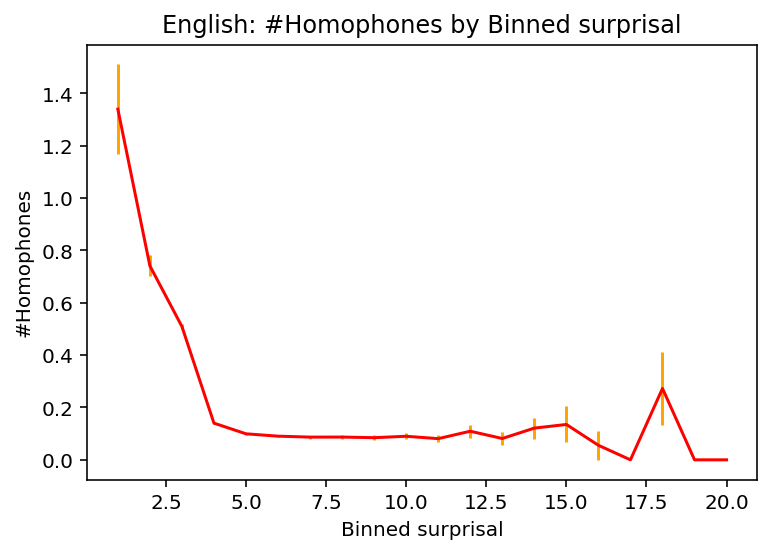

In [80]:
df_processed['surprisal_binned'] = pd.cut(df_processed['surprisal'], bins=20, labels=range(1, 21))
make_aggregated_plot(df_processed,
                    language='english',
                    syl_column="surprisal_binned",
                    homophone_column="num_homophones",
                    x_axis="Binned surprisal")

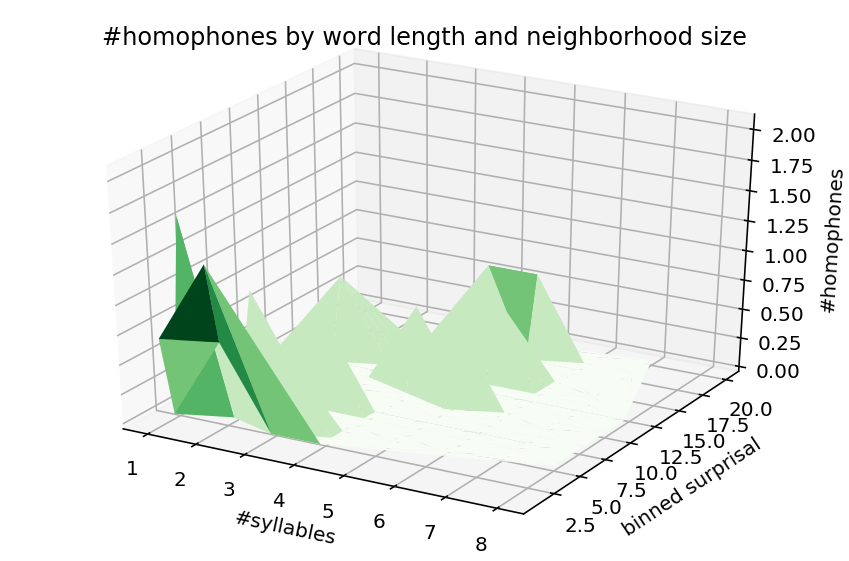

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_trisurf (df_processed['num_sylls_est'], df_processed['surprisal_binned'], 
                 np.log(df_processed['num_homophones']+ 1), cmap='Greens');
ax.set_xlabel("#syllables")
ax.set_ylabel("binned surprisal")
ax.set_zlabel("#homophones")
plt.title("#homophones by word length and neighborhood size")
plt.tight_layout()

### German

In [81]:
language = "german"

In [82]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language("german")

In [70]:
len(df_og)

51718

In [71]:
len(df_processed)

50474

In [72]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.023,
 'mean_homophones': 0.0246,
 'max_homophones': 4,
 'mean_mp': 0.7738,
 'max_mp': 21,
 'total_mp': 39058,
 'mean_mp_w_hp': 0.8548,
 'max_mp_w_hp': 29,
 'total_mp_w_hp': 43146}

#### Main analysis

In [73]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                50474
Model:                        Poisson   Df Residuals:                    50471
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Oct 2019   Pseudo R-squ.:                  0.1181
Time:                        11:23:32   Log-Likelihood:                -5218.1
converged:                       True   LL-Null:                       -5917.0
                                        LLR p-value:                3.242e-304
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6886      0.219     12.297      0.000       2.260       3.117
surprisal        -0.9284      0.049    -18.881      0.000      -1.025      -0.832
num_sylls_est    -0.4684      0.039    -11.922      0.000      -0.545      -0.391
=================================================================================
"""

#### Visualization

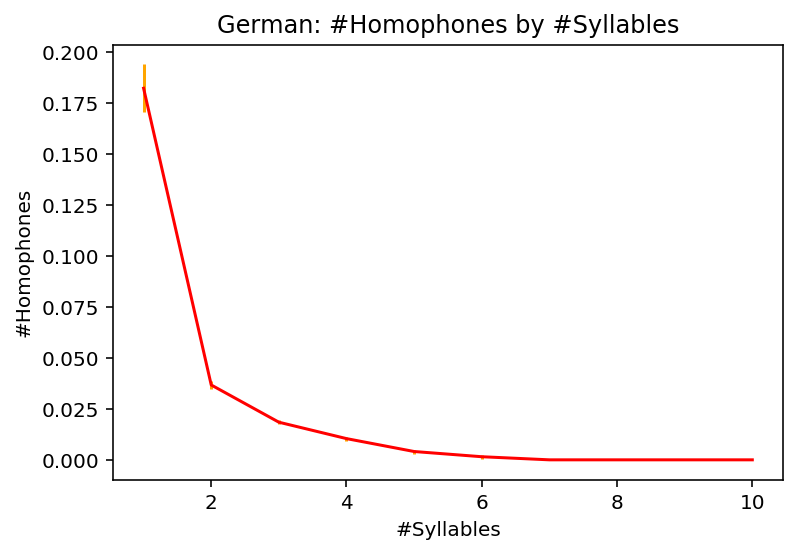

In [83]:
make_aggregated_plot(df_processed,
                    language='german',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Syllables")

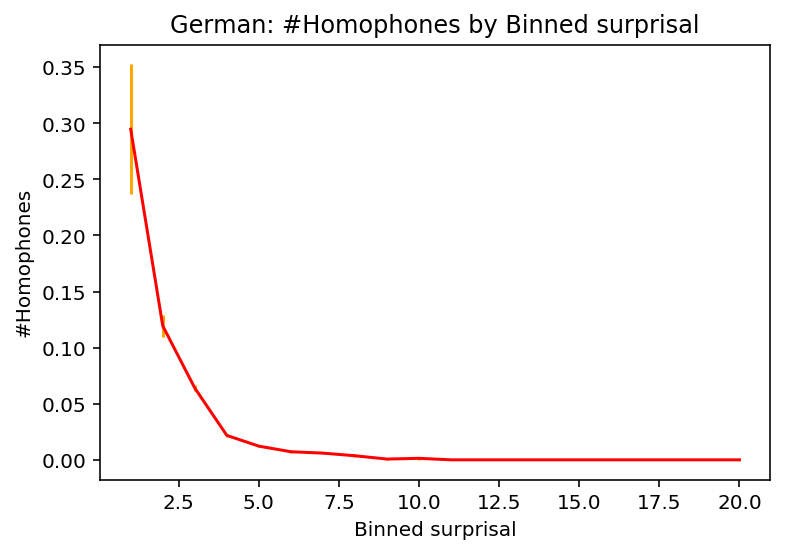

In [84]:
df_processed['surprisal_binned'] = pd.cut(df_processed['surprisal'], bins=20, labels=range(1, 21))
make_aggregated_plot(df_processed,
                    language='german',
                    syl_column="surprisal_binned",
                    homophone_column="num_homophones",
                    x_axis="Binned surprisal")

### Dutch

In [85]:
language = 'dutch'

In [86]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language("dutch")

In [87]:
len(df_og)

67910

In [88]:
len(df_processed)

65351

In [82]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.0292,
 'mean_homophones': 0.0342,
 'max_homophones': 5,
 'mean_mp': 1.1584,
 'max_mp': 35,
 'total_mp': 75701,
 'mean_mp_w_hp': 1.4446,
 'max_mp_w_hp': 64,
 'total_mp_w_hp': 94405}

#### Main analysis

In [83]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                65351
Model:                        Poisson   Df Residuals:                    65348
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Oct 2019   Pseudo R-squ.:                  0.1929
Time:                        11:03:58   Log-Likelihood:                -8088.6
converged:                       True   LL-Null:                       -10022.
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0583      0.149     20.560      0.000       2.767       3.350
surprisal        -0.7087      0.034    -20.932      0.000      -0.775      -0.642
num_sylls_est    -1.0644      0.035    -30.573      0.000      -1.133      -0.996
=================================================================================
"""

#### Visualization

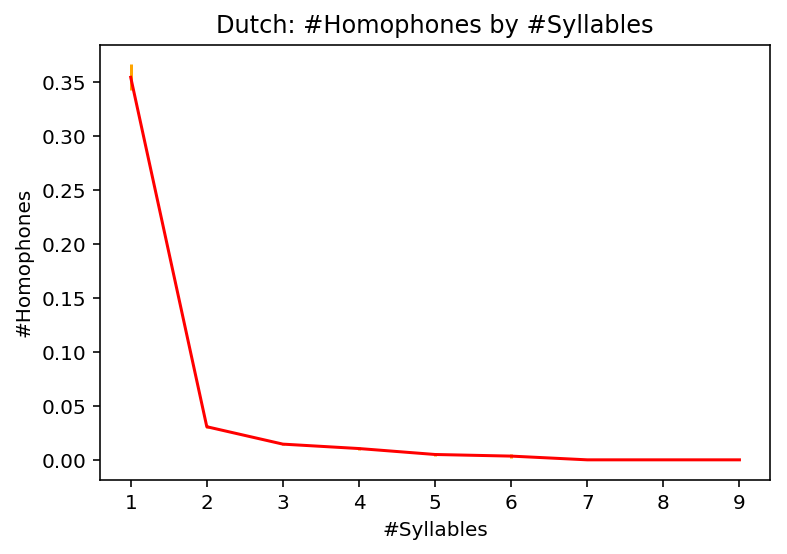

In [90]:
make_aggregated_plot(df_processed,
                    language='dutch',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Syllables")

Creating directory: Figures/dutch/replication_results


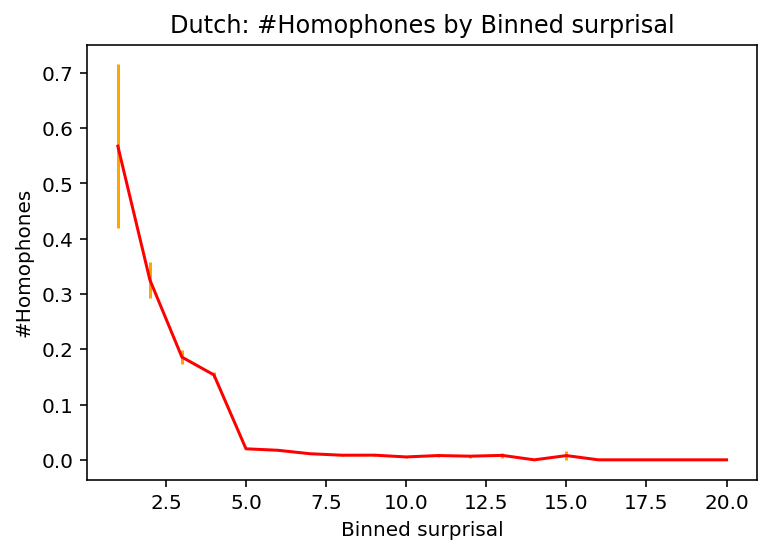

In [89]:
df_processed['surprisal_binned'] = pd.cut(df_processed['surprisal'], bins=20, labels=range(1, 21))
make_aggregated_plot(df_processed,
                    language='dutch',
                    syl_column="surprisal_binned",
                    homophone_column="num_homophones",
                    x_axis="Binned surprisal")

## Extend to French and Japanese

### French

In [91]:
language = "french"

In [92]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language(language,
                                                         phon_column=config.PHON_COLUMN[language],
                                                         word_column=config.WORD_COLUMN[language])

/Users/seantrott/Dropbox/UCSD/Research/Ambiguity/Evolution/homophone_simulations/src/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['remove'] = df[word_column].apply(remove_word)


In [93]:
len(df_og)

47310

In [94]:
len(df_processed)

37278

In [95]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.1434,
 'mean_homophones': 0.1745,
 'max_homophones': 12,
 'mean_mp': 1.9556,
 'max_mp': 39,
 'total_mp': 72901,
 'mean_mp_w_hp': 2.8871,
 'max_mp_w_hp': 97,
 'total_mp_w_hp': 107624}

#### Main analysis

In [96]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                37278
Model:                        Poisson   Df Residuals:                    37275
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Oct 2019   Pseudo R-squ.:                 0.05000
Time:                        11:25:56   Log-Likelihood:                -17929.
converged:                       True   LL-Null:                       -18873.
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1717      0.107     10.975      0.000       0.962       1.381
surprisal        -0.3860      0.024    -16.009      0.000      -0.433      -0.339
num_sylls_est    -0.3333      0.016    -20.950      0.000      -0.364      -0.302
=================================================================================
"""

#### Visualization

Creating directory: Figures/french/replication_results


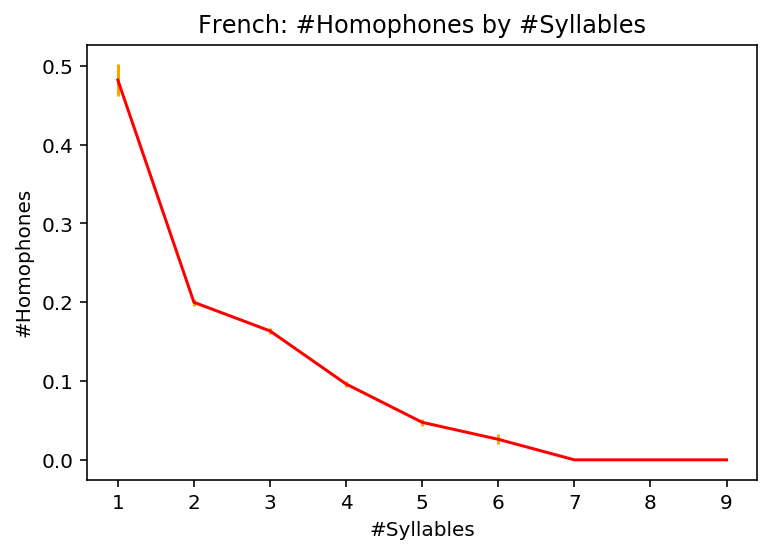

In [98]:
make_aggregated_plot(df_processed,
                    language='french',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Syllables")

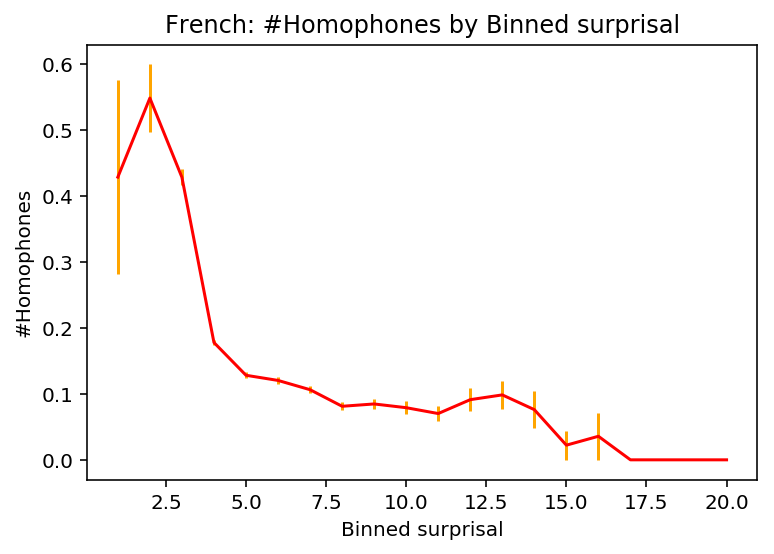

In [99]:
df_processed['surprisal_binned'] = pd.cut(df_processed['surprisal'], bins=20, labels=range(1, 21))
make_aggregated_plot(df_processed,
                    language='french',
                    syl_column="surprisal_binned",
                    homophone_column="num_homophones",
                    x_axis="Binned surprisal")

### Japanese

In [100]:
language = "japanese"

In [101]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language(language,
                                                         phon_column=config.PHON_COLUMN[language],
                                                         word_column=config.WORD_COLUMN[language])

In [102]:
len(df_og)

51147

In [103]:
len(df_processed)

40449

In [104]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.1506,
 'mean_homophones': 0.2645,
 'max_homophones': 33,
 'mean_mp': 3.9055,
 'max_mp': 43,
 'total_mp': 157972,
 'mean_mp_w_hp': 7.6132,
 'max_mp_w_hp': 273,
 'total_mp_w_hp': 307946}

#### Main analysis

In [105]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                40449
Model:                        Poisson   Df Residuals:                    40446
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Oct 2019   Pseudo R-squ.:                  0.2370
Time:                        11:26:28   Log-Likelihood:                -23133.
converged:                       True   LL-Null:                       -30318.
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.1821      0.079     65.415      0.000       5.027       5.337
surprisal        -0.8771      0.019    -44.998      0.000      -0.915      -0.839
num_sylls_est    -0.5687      0.014    -40.425      0.000      -0.596      -0.541
=================================================================================
"""

#### Visualization

Creating directory: Figures/japanese/replication_results


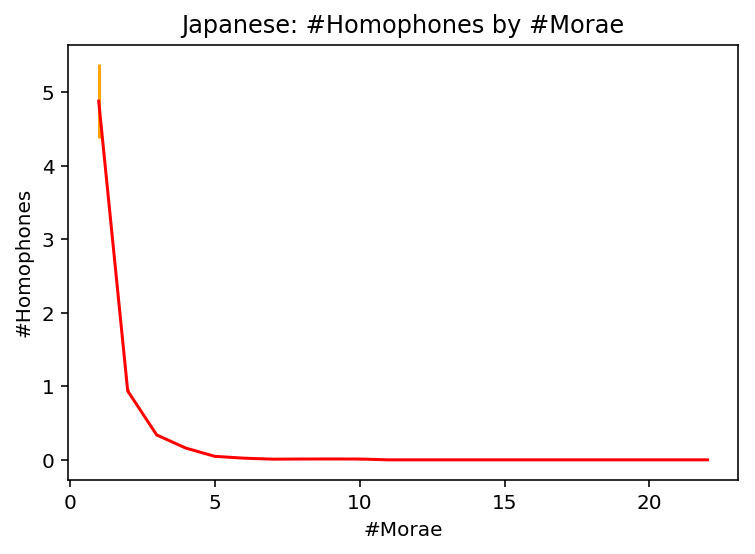

In [106]:
make_aggregated_plot(df_processed,
                    language='japanese',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Morae")

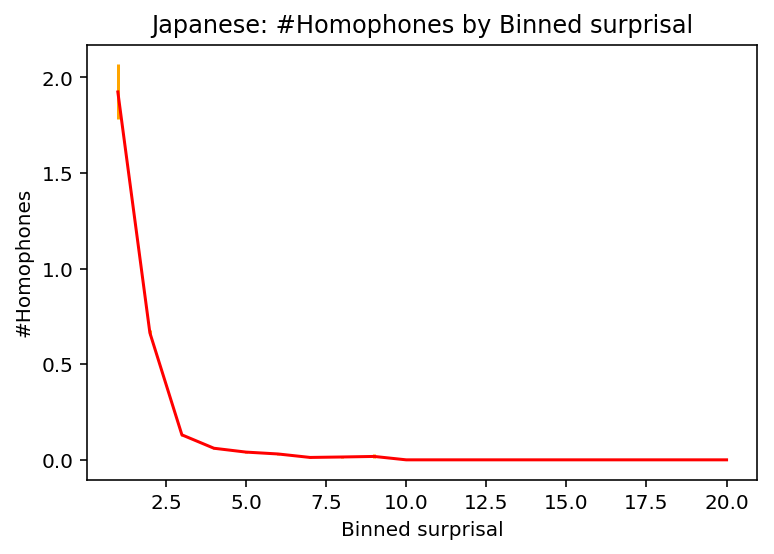

In [107]:
df_processed['surprisal_binned'] = pd.cut(df_processed['surprisal'], bins=20, labels=range(1, 21))
make_aggregated_plot(df_processed,
                    language='japanese',
                    syl_column="surprisal_binned",
                    homophone_column="num_homophones",
                    x_axis="Binned surprisal")

#### Max homophones in Japanese

Japanese has quite a few homophones per word, in some cases. What are those words?

In [111]:
df_processed.sort_values('num_homophones', ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,orth_form_kanji,orth_form_hiragana,orth_form_romaji,phonetic_form,morph_form,frequency,glosses,...,phonetic_remapped,num_phones,num_sylls_est,log_prob,surprisal,neighborhood_size,neighborhood_size_with_homophones,remove,num_homophones,surprisal_binned
401,401,485,485,¤«,¤«,ka,ka,"dia-kyu,i-adj",720,/i-adj pres. affirmative forming morphology/i/,...,ka,2,1,-4.602724,4.602724,29,252,False,33,2
1437,1437,1720,1720,¤È,¤È,to,to,"dia-kyu,part",1390,/emphasis/assertion/question/confirmation/no/,...,to,2,1,-4.603028,4.603028,23,165,False,28,2
509,509,627,627,¤­,¤­,ki,ki,pres,4,/i-adj. plain present attributive morphology (...,...,ki,2,1,-4.602866,4.602866,25,220,False,25,2
2184,2184,2716,2716,¤è,¤è,yo,yo,part,1524,"/emphasis marker (..., you know. I'm telling y...",...,yo,2,1,-4.603285,4.603285,22,156,False,24,2
1744,1744,2100,2100,¤Ò,¤Ò,hi,hi,k5,0,/to grind/,...,hi,2,1,-4.602896,4.602896,23,154,False,23,2


In [121]:
df_og[df_og['phonetic_form']=="ka"]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,orth_form_kanji,orth_form_hiragana,orth_form_romaji,phonetic_form,morph_form,frequency,glosses,multiple_pronunications,phonetic_remapped,num_phones,num_sylls_est,log_prob,surprisal,neighborhood_size,neighborhood_size_with_homophones
401,401,485,485,¤«,¤«,ka,ka,"dia-kyu,i-adj",720,/i-adj pres. affirmative forming morphology/i/,False,ka,2,1,-4.602724,4.602724,29,252
402,402,486,486,¤«,¤«,ka,ka,part,720,/question marker/X or Y (conjunctional particle)/,False,ka,2,1,-4.602724,4.602724,29,252
15284,15284,18397,18397,²½,¤«,ka,ka,"si,s5,suffix",720,/to change/to turn into/to convert to/to trans...,False,ka,2,1,-4.602724,4.602724,29,252
15285,15285,18398,18398,²½,¤«,ka,ka,suffix,720,/-ize/,False,ka,2,1,-4.602724,4.602724,29,252
15694,15694,18809,18809,²Á,¤«,ka,ka,"noun,si",720,/price/cost/value/worth/valence//to evaluate/t...,False,ka,2,1,-4.602724,4.602724,29,252
15705,15705,18820,18820,²Â,¤«,ka,ka,noun,720,/beautiful/good/excellent/,False,ka,2,1,-4.602724,4.602724,29,252
15737,15737,18929,18929,²Ã,¤«,ka,ka,"si,noun",720,/to add/to increase//addition/increase/,False,ka,2,1,-4.602724,4.602724,29,252
15809,15809,19084,19084,²Ä,¤«,ka,ka,noun,720,/passable/,False,ka,2,1,-4.602724,4.602724,29,252
15923,15923,19312,19312,²Ç,¤«,ka,ka,si,720,/to marry (a man)/to be married to/to lay (the...,False,ka,2,1,-4.602724,4.602724,29,252
16027,16027,19452,19452,²Ê,¤«,ka,ka,si,720,/to inflict/to impose/,False,ka,2,1,-4.602724,4.602724,29,252


In [122]:
df_og[df_og['phonetic_form']=="to"]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,orth_form_kanji,orth_form_hiragana,orth_form_romaji,phonetic_form,morph_form,frequency,glosses,multiple_pronunications,phonetic_remapped,num_phones,num_sylls_est,log_prob,surprisal,neighborhood_size,neighborhood_size_with_homophones
1437,1437,1720,1720,¤È,¤È,to,to,"dia-kyu,part",1390,/emphasis/assertion/question/confirmation/no/,False,to,2,1,-4.603028,4.603028,23,165
1438,1438,1721,1721,¤È,¤È,to,to,part,1390,/adv. forming morphology; attached to specific...,False,to,2,1,-4.603028,4.603028,23,165
1439,1439,1722,1722,¤È,¤È,to,to,part,1390,/quotation marker: (I think)that.../(they said...,False,to,2,1,-4.603028,4.603028,23,165
16706,16706,20454,20454,²ò,¤È,to,to,k5,1390,/to solve/to answer/to untie/to dissolve/,False,to,2,1,-4.603028,4.603028,23,165
17321,17321,21269,21269,³Ï,¤È,to,to,r5,1390,/to harvest/,False,to,2,1,-4.603028,4.603028,23,165
21982,21982,29289,29289,¸¦,¤È,to,to,g5,1390,/to sharpen/to polish/,False,to,2,1,-4.603028,4.603028,23,165
22740,22740,30482,30482,¸Í,¤È,to,to,noun,1390,/door (Japanese style)/,False,to,2,1,-4.603028,4.603028,23,165
25099,25099,35466,35466,ºÎ,¤È,to,to,r5,1390,/take/gather (fruit/vegetables/nuts/etc.)/empl...,False,to,2,1,-4.603028,4.603028,23,165
25126,25126,35501,35501,ºÓ,¤È,to,to,r5,1390,/take/,False,to,2,1,-4.603028,4.603028,23,165
25430,25430,36054,36054,»£,¤È,to,to,r5,1390,/take (pictures)/,False,to,2,1,-4.603028,4.603028,23,165
